In [3]:
# @title Data Setup

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import itertools
import seaborn as sns


import random

data_raw = pd.read_csv('data.csv')
data_raw.head()

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,500,27.0,Female,Snapchat,120.0,4.0,40.0,18.0,22.0,Neutral
1,488,21.0,Non-binary,Snapchat,60.0,1.0,18.0,7.0,12.0,Neutral
2,776,28.0,Non-binary,Snapchat,115.0,3.0,38.0,18.0,27.0,Anxiety
3,869,27.0,Male,Telegram,105.0,3.0,48.0,20.0,28.0,Anxiety
4,573,21.0,Non-binary,Facebook,55.0,3.0,17.0,7.0,12.0,Neutral


# Data Visualization

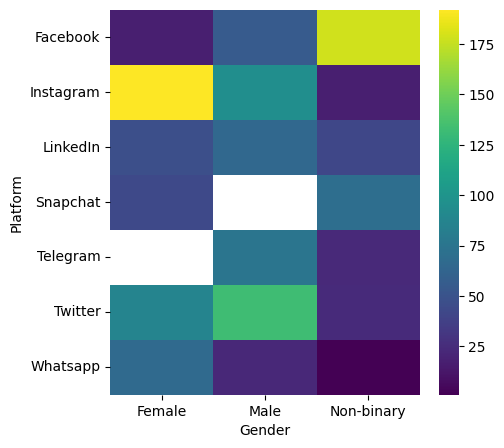

In [4]:
# Gender vs Platform

plt.subplots(figsize=(5, 5))
df_2dhist = pd.DataFrame({
    x_label: grp['Platform'].value_counts()
    for x_label, grp in data_raw.groupby('Gender')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Gender')
_ = plt.ylabel('Platform')

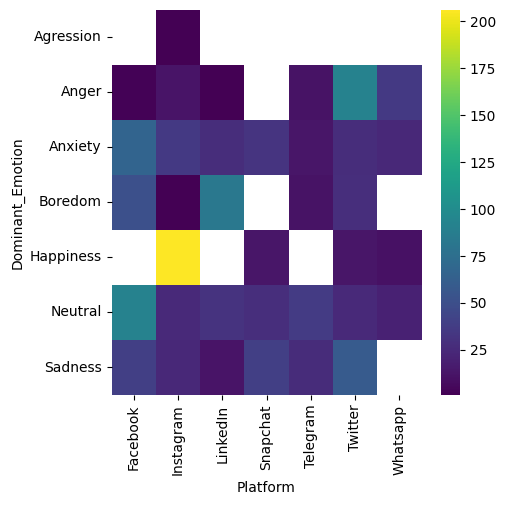

In [5]:
# Platform vs Dominant_Emotion

plt.subplots(figsize=(5, 5))
df_2dhist = pd.DataFrame({
    x_label: grp['Dominant_Emotion'].value_counts()
    for x_label, grp in data_raw.groupby('Platform')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Platform')
_ = plt.ylabel('Dominant_Emotion')

<Axes: >

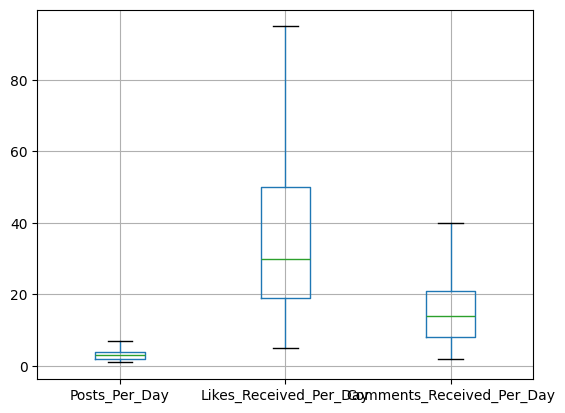

In [11]:
# @title Boxplot of other datapoints
data_raw.boxplot(column=['Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day'], showfliers=False)

In [6]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1251 entries, 0 to 1250
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     1251 non-null   int64  
 1   Age                         1251 non-null   float64
 2   Gender                      1251 non-null   object 
 3   Platform                    1251 non-null   object 
 4   Daily_Usage_Time (minutes)  1251 non-null   float64
 5   Posts_Per_Day               1251 non-null   float64
 6   Likes_Received_Per_Day      1251 non-null   float64
 7   Comments_Received_Per_Day   1251 non-null   float64
 8   Messages_Sent_Per_Day       1251 non-null   float64
 9   Dominant_Emotion            1251 non-null   object 
dtypes: float64(6), int64(1), object(3)
memory usage: 97.9+ KB


In [7]:
data_raw.columns
data_raw['Gender'].unique()
data_raw['Platform'].unique()
data_raw['Dominant_Emotion'].unique()

array(['Neutral', 'Anxiety', 'Happiness', 'Boredom', 'Sadness', 'Anger',
       'Agression'], dtype=object)

In [ ]:
# Convert non-numeric data to numeric
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data = data_raw.apply(le.fit_transform)
data = data.drop('User_ID', axis = 1)
data.head()